In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../data/clean_hamster_foods.csv')
#key info
print(f"Dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst entries:")
df.head()

Dataset shape: (131, 5)

Data types:
food             object
type             object
safe               bool
controversial      bool
notes            object
dtype: object

First entries:


,food,type,safe,controversial,notes
0,Acai,Fruits,True,False,prepared any way
1,Apple,Fruits,True,False,prepared any way
2,Apricot,Fruits,True,False,prepared any way
3,Banana,Fruits,True,False,prepared any way
4,Blueberry,Fruits,True,False,prepared any way


In [18]:
#Basic Statistics
print("=== Hamster Bites Quick Stats ===\n")
print(f"Total foods in database: {len(df)}")
print(f"Safe foods: {df['safe'].sum()} ({df['safe'].mean()*100:.1f}%)")
print(f"Dangerous foods: {(~df['safe']).sum()} ({(~df['safe']).mean()*100:.1f}%)")
print(f"Controversial foods: {df['controversial'].sum()} ({df['controversial'].mean()*100:.1f}%)")
print(f"Food Types: {df['type'].value_counts()}")
print(f"Type with most controversial foods: {df.groupby('type')['controversial'].sum().idxmax()}")
print(f"Type with most dangerous foods: {df[~df['safe']]['type'].value_counts().index[0]}")

=== Hamster Bites Quick Stats ===

Total foods in database: 131
Safe foods: 124 (94.7%)
Dangerous foods: 7 (5.3%)
Controversial foods: 15 (11.5%)
Food Types: type
Vegetables             43
Fruits                 39
Miscellaneous Foods    35
Proteins               14
Name: count, dtype: int64
Type with most controversial foods: Miscellaneous Foods
Type with most dangerous foods: Vegetables


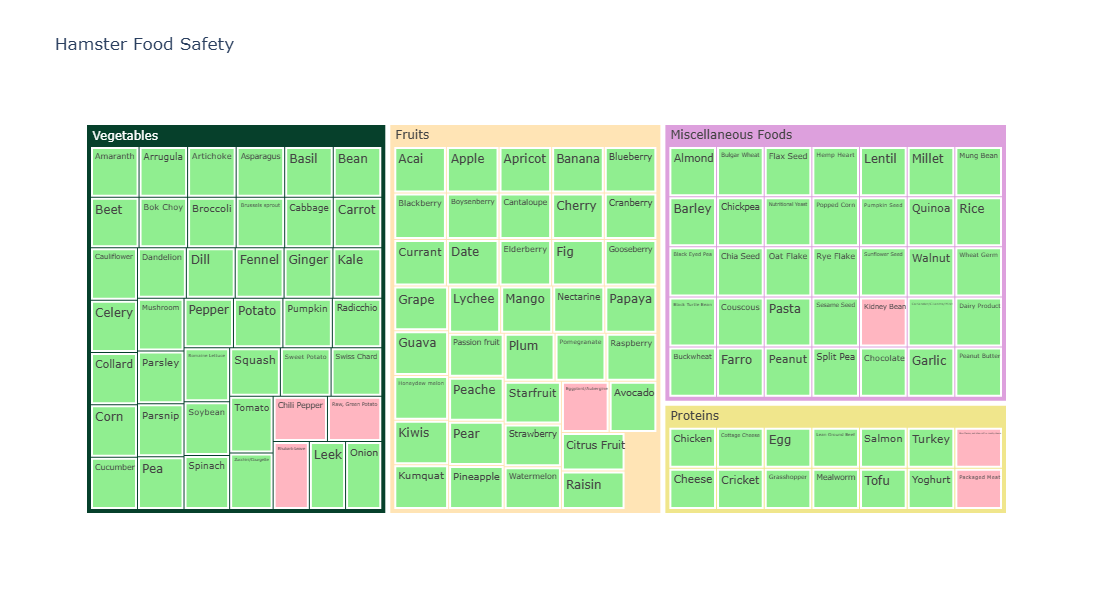

In [16]:
#Visualization
treemap_df = df.copy()
treemap_df['safety_status'] = treemap_df['safe'].map({True:'Safe', False: 'Unsafe'})

type_colors = {
    'Fruits': '#FFE4B5',           # Moccasin
    'Vegetables': '#06402B',       # DarkGreen  
    'Proteins': '#F0E68C',         # Khaki
    'Miscellaneous Foods': '#DDA0DD'  # Plum
}

ids = []
labels = []
parents = []
colors = []
hover_text = []
for foodType in treemap_df['type'].unique():
    ids.append(foodType)
    labels.append(foodType)
    parents.append("")
    colors.append(type_colors[foodType])

for _, row in treemap_df.iterrows():
    ids.append(row['food'])
    labels.append(row['food'])
    parents.append(row['type'])
    colors.append('#90EE90' if row['safe'] else '#FFB6C1')
    hover_info = f"Food: {row['food']} <br> Safe: {row['safe']}<br>Controversial: {row['controversial']}<br>Notes: {row['notes']}"
    hover_text.append(hover_info)
fig = go.Figure(go.Treemap(
    ids = ids,
    labels = labels,
    parents = parents,
    marker_colors = colors,
    textfont_size = 12,
    marker_line = dict(width=2, color = 'white'),
    hovertext = hover_text,
    hovertemplate = '%{hovertext}<extra></extra>'
))
fig.update_layout(title="Hamster Food Safety", height=600)

fig.show()